In [35]:
import pandas as pd
import numpy as np
import sklearn.datasets
import sklearn.metrics as metrics
# бібліотеки для візуалізації
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
import sklearn.metrics
# візуалізація границь рішень, встановлюється через:
# pip install git+https://github.com/PanWu/pylib.git
import pylib.plot

X, y = sklearn.datasets.load_digits(return_X_y=True)

In [36]:
def confussion_matrix(y_true, y_predicted):
    confussion = metrics.confusion_matrix(y_true, y_predicted)
    sns.heatmap(confussion, annot=True, fmt='g', cmap='Blues')
    print(f'accuracy: {metrics.accuracy_score(y_true, y_predicted)} \n \
    precision: {metrics.precision_score(y_true, y_predicted, average="micro")} \n \
    recall: {metrics.recall_score(y_true, y_predicted, average="micro")} \n \
    f1_score: {metrics.f1_score(y_true, y_predicted, average="micro")}')

In [37]:
def gridsearchscore(model_gs):
    print(f'Best score: {model_gs.best_score_}, Best parameters: {model_gs.best_params_}')

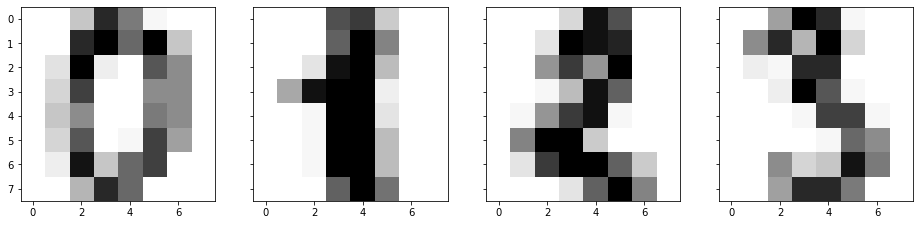

In [38]:
# оголошуємо вісі для графіків
f, axes = plt.subplots(1, 4, sharey=True, figsize=(16, 6))  
# виводимо малюнки рукописних цифр
for i in range(4):
    axes[i].imshow(X[i, :].reshape([8, 8]), cmap="Greys");

In [39]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y,
                     test_size=0.2,
                     random_state=17)

Одношарова:


In [40]:
model_perc = MLPClassifier(max_iter=100000)

In [41]:
model_perc.fit(X_train, y_train)

MLPClassifier(max_iter=100000)

In [42]:
predict = model_perc.predict(X_test)

accuracy: 0.9722222222222222 
     precision: 0.9722222222222222 
     recall: 0.9722222222222222 
     f1_score: 0.9722222222222222


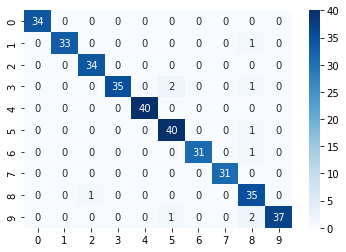

In [43]:
confussion_matrix(y_test, predict)

In [44]:
predict = model_perc.predict(X_train)

accuracy: 1.0 
     precision: 1.0 
     recall: 1.0 
     f1_score: 1.0


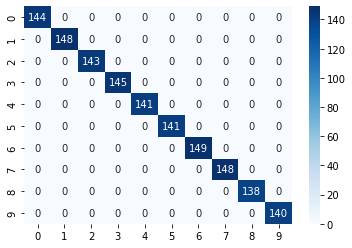

In [45]:
confussion_matrix(y_train, predict)

Одразу видно, що одношарової нейронної мережі буде достатньо для нашого датасету <br>
Перевіримо різні значення гіперпараметрів для неї <br> 


In [46]:
from sklearn.model_selection import GridSearchCV

parameters = {'alpha': [0.01, 0.1, 1, 2, 5, 10]}

model_perc_gs = GridSearchCV(model_perc,
                             parameters,
                             scoring='accuracy',
                             cv=5, n_jobs=-1)

In [47]:
model_perc_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=100000), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 2, 5, 10]},
             scoring='accuracy')

In [48]:
gridsearchscore(model_perc_gs)

Best score: 0.9819154084397986, Best parameters: {'alpha': 1}


In [49]:
predict = model_perc.predict(X_test)

accuracy: 0.9722222222222222 
     precision: 0.9722222222222222 
     recall: 0.9722222222222222 
     f1_score: 0.9722222222222222


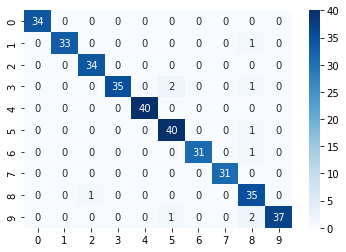

In [50]:
confussion_matrix(y_test, predict)

In [51]:
predict = model_perc.predict(X_train)

accuracy: 1.0 
     precision: 1.0 
     recall: 1.0 
     f1_score: 1.0


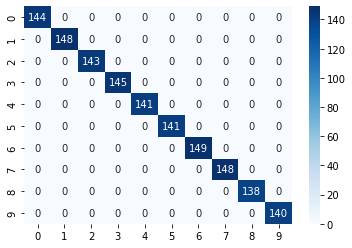

In [52]:
confussion_matrix(y_train, predict)

In [53]:
parameters = {'hidden_layer_sizes': [(10, ), (50, ), (100, ), (150, )]}

model_perc_gs = GridSearchCV(model_perc,
                             parameters,
                             scoring='accuracy',
                             cv=5, n_jobs=-1)

In [54]:
model_perc_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=100000), n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(10,), (50,), (100,), (150,)]},
             scoring='accuracy')

In [55]:
gridsearchscore(model_perc_gs)

Best score: 0.9721762485481997, Best parameters: {'hidden_layer_sizes': (150,)}


In [56]:
predict = model_perc.predict(X_test)

accuracy: 0.9722222222222222 
     precision: 0.9722222222222222 
     recall: 0.9722222222222222 
     f1_score: 0.9722222222222222


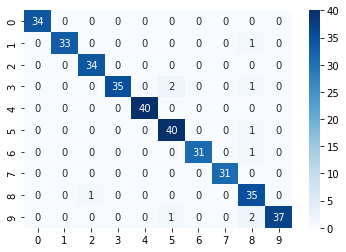

In [57]:
confussion_matrix(y_test, predict)

In [58]:
predict = model_perc.predict(X_train)

accuracy: 1.0 
     precision: 1.0 
     recall: 1.0 
     f1_score: 1.0


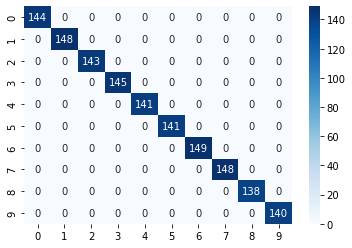

In [59]:
confussion_matrix(y_train, predict)

In [60]:
parameters = {'alpha': [0.1, 1, 2, 5, 10], \
            'hidden_layer_sizes': [(50, ), (100, ), (150, )]}

model_perc_gs = GridSearchCV(model_perc,
                             parameters,
                             scoring='accuracy',
                             cv=5, n_jobs=-1)

In [61]:
model_perc_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=100000), n_jobs=-1,
             param_grid={'alpha': [0.1, 1, 2, 5, 10],
                         'hidden_layer_sizes': [(50,), (100,), (150,)]},
             scoring='accuracy')

In [62]:
gridsearchscore(model_perc_gs)

Best score: 0.9826098528842431, Best parameters: {'alpha': 1, 'hidden_layer_sizes': (150,)}


In [63]:
predict = model_perc.predict(X_test)

accuracy: 0.9722222222222222 
     precision: 0.9722222222222222 
     recall: 0.9722222222222222 
     f1_score: 0.9722222222222222


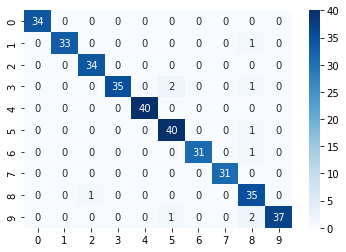

In [64]:
confussion_matrix(y_test, predict)

In [65]:
predict = model_perc.predict(X_train)

accuracy: 1.0 
     precision: 1.0 
     recall: 1.0 
     f1_score: 1.0


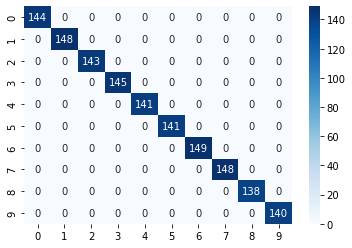

In [66]:
confussion_matrix(y_train, predict)

Двошарова:

In [74]:
parameters = {'alpha': [0.1, 1, 2, 5, 10], \
            'hidden_layer_sizes': [(50, 100), (100, 50), (50, 50), (100, 100)]}


model_perc_gs = GridSearchCV(model_perc,
                             parameters,
                             scoring='accuracy',
                             cv=5, n_jobs=-1)

In [75]:
model_perc_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=100000), n_jobs=-1,
             param_grid={'alpha': [0.1, 1, 2, 5, 10],
                         'hidden_layer_sizes': [(50, 100), (100, 50), (50, 50),
                                                (100, 100)]},
             scoring='accuracy')

In [76]:
gridsearchscore(model_perc_gs)

Best score: 0.9840035811072397, Best parameters: {'alpha': 1, 'hidden_layer_sizes': (100, 50)}


In [77]:
predict = model_perc.predict(X_test)

accuracy: 0.9722222222222222 
     precision: 0.9722222222222222 
     recall: 0.9722222222222222 
     f1_score: 0.9722222222222222


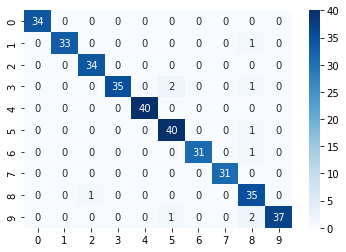

In [78]:
confussion_matrix(y_test, predict)

In [79]:
predict = model_perc.predict(X_train)

accuracy: 1.0 
     precision: 1.0 
     recall: 1.0 
     f1_score: 1.0


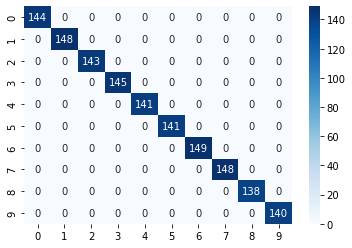

In [80]:
confussion_matrix(y_train, predict)

Двошарова нейронна мережа дала такі ж самі значення метрик на тестовій вибірці, тому припущення про те, що одношарової мережі буде достатньо було вірним